In [ ]:
# https://www.machinecurve.com/index.php/2021/02/03/how-to-use-k-fold-cross-validation-with-pytorch/

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
ls

gdrive/  sample_data/


In [ ]:
cd /content/gdrive/My Drive/ZFDataset/

/content/gdrive/My Drive/ZFDataset


In [ ]:
import os
import sys
import tempfile
import pathlib
from io import BytesIO
import base64
import pandas as pd

import numpy as np
from PIL import Image, ImageOps

from matplotlib import cm

from scipy import ndimage as ndi
from skimage import io, filters, measure, morphology, img_as_ubyte
import pandas as pd
from sklearn import decomposition, manifold

In [ ]:
base_path = '/content/gdrive/My Drive/ZFDataset/'

In [ ]:
# syllable_df_Nest_Total = pd.read_pickle(base_path+Nest_analysis+'_Densenet121.pkl')
# syllable_df_Nest_Total1 = pd.read_pickle('/content/gdrive/My Drive/ZFDataset/Nest4_Densenet121.pkl')
# syllable_df_Nest_Total2 = pd.read_pickle('/content/gdrive/My Drive/ZFDataset/Nest5_Densenet121.pkl')

In [ ]:
# syllable_df_Nest_Total1 = pd.read_pickle('/content/gdrive/My Drive/ZFDataset/Nest1_Densenet121.pkl')
# syllable_df_Nest_Total1['Nest'] = "Nest1"
syllable_df_Nest_Total2 = pd.read_pickle('/content/gdrive/My Drive/ZFDataset/Nest2_Densenet121.pkl')
syllable_df_Nest_Total2['Nest'] = "Nest2"
syllable_df_Nest_Total3 = pd.read_pickle('/content/gdrive/My Drive/ZFDataset/Nest3_Densenet121.pkl')
syllable_df_Nest_Total3['Nest'] = "Nest3"
syllable_df_Nest_Total4 = pd.read_pickle('/content/gdrive/My Drive/ZFDataset/Nest4_Densenet121.pkl')
syllable_df_Nest_Total4['Nest'] = "Nest4"
syllable_df_Nest_Total5 = pd.read_pickle('/content/gdrive/My Drive/ZFDataset/Nest5_Densenet121.pkl')
syllable_df_Nest_Total5['Nest'] = "Nest5"
syllable_df_Nest_Total6 = pd.read_pickle('/content/gdrive/My Drive/ZFDataset/Nest6_Densenet121.pkl')
syllable_df_Nest_Total6['Nest'] = "Nest6"
syllable_df_Nest_Total7 = pd.read_pickle('/content/gdrive/My Drive/ZFDataset/Nest7_Densenet121.pkl')
syllable_df_Nest_Total7['Nest'] = "Nest7"
syllable_df_Nest_Total8 = pd.read_pickle('/content/gdrive/My Drive/ZFDataset/Nest8_Densenet121.pkl')
syllable_df_Nest_Total8['Nest'] = "Nest8"
syllable_df_Nest_Total9 = pd.read_pickle('/content/gdrive/My Drive/ZFDataset/Nest9_Densenet121.pkl')
syllable_df_Nest_Total9['Nest'] = "Nest9"
syllable_df_Nest_Total10 = pd.read_pickle('/content/gdrive/My Drive/ZFDataset/Nest10_Densenet121.pkl')
syllable_df_Nest_Total10['Nest'] = "Nest10"
syllable_df_Nest_Total11 = pd.read_pickle('/content/gdrive/My Drive/ZFDataset/Nest11_Densenet121.pkl')
syllable_df_Nest_Total11['Nest'] = "Nest11"

In [ ]:
# syllable_df_Nest_Total = pd.concat([syllable_df_Nest_Total2, syllable_df_Nest_Total3, syllable_df_Nest_Total4, syllable_df_Nest_Total5], ignore_index=True)
syllable_df_Nest_Total = pd.concat([syllable_df_Nest_Total2, syllable_df_Nest_Total3, syllable_df_Nest_Total4, syllable_df_Nest_Total5,
                                    syllable_df_Nest_Total6, syllable_df_Nest_Total7, syllable_df_Nest_Total8, syllable_df_Nest_Total9, syllable_df_Nest_Total10, syllable_df_Nest_Total11], ignore_index=True)
del syllable_df_Nest_Total11, syllable_df_Nest_Total2, syllable_df_Nest_Total3, syllable_df_Nest_Total4, syllable_df_Nest_Total5
del syllable_df_Nest_Total6, syllable_df_Nest_Total7, syllable_df_Nest_Total8, syllable_df_Nest_Total9, syllable_df_Nest_Total10

In [ ]:
syllable_df_Nest_Total.drop(columns=['audio', 'spectrogram'], inplace=True)

In [ ]:
syllable_df_Nest_Total

,start_time,end_time,labels,indv,indvi,key,rate,labels_indv,densenet121_features,Nest
0,0.050414,0.097987,i,cxyc,1,cxyc_0000,44100,cxyc_i,"[0.00028999924, 0.0064279474, 0.0022861622, 0....",Nest2
1,0.508713,0.570935,i,cxyc,2,cxyc_0000,44100,cxyc_i,"[0.0002864063, 0.0052835844, 0.002387906, 0.00...",Nest2
2,0.644405,0.703089,i,cxyc,3,cxyc_0000,44100,cxyc_i,"[0.0002815476, 0.0063230395, 0.002232295, 0.00...",Nest2
3,0.810504,0.870799,i,cxyc,4,cxyc_0000,44100,cxyc_i,"[0.00028404495, 0.004314999, 0.0023957393, 0.0...",Nest2
4,0.938940,1.000845,i,cxyc,5,cxyc_0000,44100,cxyc_i,"[0.00026726056, 0.0051532886, 0.0022074692, 0....",Nest2
...,...,...,...,...,...,...,...,...,...,...
23050,2.372736,2.450990,f,vstd,16,vstd_0004,44100,vstd_f,"[0.00024792607, 0.005248108, 0.0019565802, 0.0...",Nest11
23051,2.598813,2.651443,0,vstd,17,vstd_0004,44100,vstd_0,"[0.00027455005, 0.0042480123, 0.0022447598, 0....",Nest11
23052,3.907656,3.982781,0,vstd,18,vstd_0004,44100,vstd_0,"[0.0002736851, 0.0052517042, 0.001988696, 0.00...",Nest11
23053,4.090015,4.216341,0,vstd,19,vstd_0004,44100,vstd_0,"[0.00030207614, 0.0031468559, 0.0016397715, 0....",Nest11


In [ ]:
# Tutor_dataset = syllable_df_Nest_Total[syllable_df_Nest_Total['indv'].isin(["ivoj", "nzen", "xsup", "gthh", "ttog", "isab", "ixea", "ihza", "zegf", "sjew"])].reset_index(drop=True)
Tutor_dataset = syllable_df_Nest_Total[syllable_df_Nest_Total['indv'].isin(["ivoj", "nzen", "xsup", "gthh", "ttog", "isab", "ixea", "ihza", "zegf", "sjew", "cgby"])].reset_index(drop=True)

In [ ]:
Pupil_dataset = syllable_df_Nest_Total[syllable_df_Nest_Total['indv'].isin(["hphi", "cyea", "phpd", "cxyc", "qfod", "nsrn", "khxv", "oogw", "kcos", "tbfk", "kccr", "bbyj", "onsu", "vusu", "kfgj", "inji", "hsew", "sdhp", "vstd"])].reset_index(drop=True)

In [ ]:
Tutor_dataset

,start_time,end_time,labels,indv,indvi,key,rate,labels_indv,densenet121_features,Nest
0,0.141369,0.163840,i,nzen,1,nzen_0000,44100,nzen_i,"[0.000281047, 0.006896307, 0.0021862306, 0.003...",Nest2
1,0.226426,0.290575,i,nzen,2,nzen_0000,44100,nzen_i,"[0.0003058371, 0.005542181, 0.0023643032, 0.00...",Nest2
2,0.388081,0.453342,i,nzen,3,nzen_0000,44100,nzen_i,"[0.0002870175, 0.0060381475, 0.0023333135, 0.0...",Nest2
3,0.487174,0.550757,j,nzen,4,nzen_0000,44100,nzen_j,"[0.0003228713, 0.0052634007, 0.0023634112, 0.0...",Nest2
4,0.579305,0.642185,a,nzen,5,nzen_0000,44100,nzen_a,"[0.00028934886, 0.0054234248, 0.00228799, 0.00...",Nest2
...,...,...,...,...,...,...,...,...,...,...
7176,10.182711,10.273732,0,cgby,39,cgby_0032,44100,cgby_0,"[0.0003101198, 0.0023758058, 0.00217167, 0.003...",Nest11
7177,10.322530,10.421079,0,cgby,40,cgby_0032,44100,cgby_0,"[0.00037552853, 0.004450283, 0.0019465615, 0.0...",Nest11
7178,10.451782,10.581827,0,cgby,41,cgby_0032,44100,cgby_0,"[0.00045851385, 0.0021333802, 0.0020485146, 0....",Nest11
7179,10.640036,10.822507,0,cgby,42,cgby_0032,44100,cgby_0,"[0.00029902745, 0.0032967748, 0.0025172085, 0....",Nest11


In [ ]:
Pupil_dataset

,start_time,end_time,labels,indv,indvi,key,rate,labels_indv,densenet121_features,Nest
0,0.050414,0.097987,i,cxyc,1,cxyc_0000,44100,cxyc_i,"[0.00028999924, 0.0064279474, 0.0022861622, 0....",Nest2
1,0.508713,0.570935,i,cxyc,2,cxyc_0000,44100,cxyc_i,"[0.0002864063, 0.0052835844, 0.002387906, 0.00...",Nest2
2,0.644405,0.703089,i,cxyc,3,cxyc_0000,44100,cxyc_i,"[0.0002815476, 0.0063230395, 0.002232295, 0.00...",Nest2
3,0.810504,0.870799,i,cxyc,4,cxyc_0000,44100,cxyc_i,"[0.00028404495, 0.004314999, 0.0023957393, 0.0...",Nest2
4,0.938940,1.000845,i,cxyc,5,cxyc_0000,44100,cxyc_i,"[0.00026726056, 0.0051532886, 0.0022074692, 0....",Nest2
...,...,...,...,...,...,...,...,...,...,...
15869,2.372736,2.450990,f,vstd,16,vstd_0004,44100,vstd_f,"[0.00024792607, 0.005248108, 0.0019565802, 0.0...",Nest11
15870,2.598813,2.651443,0,vstd,17,vstd_0004,44100,vstd_0,"[0.00027455005, 0.0042480123, 0.0022447598, 0....",Nest11
15871,3.907656,3.982781,0,vstd,18,vstd_0004,44100,vstd_0,"[0.0002736851, 0.0052517042, 0.001988696, 0.00...",Nest11
15872,4.090015,4.216341,0,vstd,19,vstd_0004,44100,vstd_0,"[0.00030207614, 0.0031468559, 0.0016397715, 0....",Nest11


In [ ]:
import torch
import torch.nn as nn
import re
import spacy
from collections import Counter
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F
import string
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
from sklearn.metrics import mean_squared_error
from datetime import datetime

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import column_or_1d
from sklearn.model_selection import train_test_split
from torch.utils.data.dataset import Subset
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
le = LabelEncoder()

In [ ]:
# le.fit(syllable_df_Nest_Total['indv'].to_list())
le.fit(syllable_df_Nest_Total['Nest'].to_list())

LabelEncoder()

In [ ]:
# targets = le.transform(syllable_df_Nest_Total['indv'].to_list())
targets = le.transform(syllable_df_Nest_Total['Nest'].to_list())

In [ ]:
targets

array([2, 2, 2, ..., 1, 1, 1])

In [ ]:
list(le.classes_)

['Nest10',
 'Nest11',
 'Nest2',
 'Nest3',
 'Nest4',
 'Nest5',
 'Nest6',
 'Nest7',
 'Nest8',
 'Nest9']

In [ ]:
syllable_df_Nest_Total['indv_encoded'] = targets

In [ ]:
syllable_df_Nest_Total

,start_time,end_time,labels,indv,indvi,key,rate,labels_indv,densenet121_features,Nest,indv_encoded
0,0.050414,0.097987,i,cxyc,1,cxyc_0000,44100,cxyc_i,"[0.00028999924, 0.0064279474, 0.0022861622, 0....",Nest2,2
1,0.508713,0.570935,i,cxyc,2,cxyc_0000,44100,cxyc_i,"[0.0002864063, 0.0052835844, 0.002387906, 0.00...",Nest2,2
2,0.644405,0.703089,i,cxyc,3,cxyc_0000,44100,cxyc_i,"[0.0002815476, 0.0063230395, 0.002232295, 0.00...",Nest2,2
3,0.810504,0.870799,i,cxyc,4,cxyc_0000,44100,cxyc_i,"[0.00028404495, 0.004314999, 0.0023957393, 0.0...",Nest2,2
4,0.938940,1.000845,i,cxyc,5,cxyc_0000,44100,cxyc_i,"[0.00026726056, 0.0051532886, 0.0022074692, 0....",Nest2,2
...,...,...,...,...,...,...,...,...,...,...,...
23050,2.372736,2.450990,f,vstd,16,vstd_0004,44100,vstd_f,"[0.00024792607, 0.005248108, 0.0019565802, 0.0...",Nest11,1
23051,2.598813,2.651443,0,vstd,17,vstd_0004,44100,vstd_0,"[0.00027455005, 0.0042480123, 0.0022447598, 0....",Nest11,1
23052,3.907656,3.982781,0,vstd,18,vstd_0004,44100,vstd_0,"[0.0002736851, 0.0052517042, 0.001988696, 0.00...",Nest11,1
23053,4.090015,4.216341,0,vstd,19,vstd_0004,44100,vstd_0,"[0.00030207614, 0.0031468559, 0.0016397715, 0....",Nest11,1


In [ ]:
max_sequence_length = syllable_df_Nest_Total['indvi'].max()

In [ ]:
# current_songfile = syllable_df_Nest_Total.loc[syllable_df_Nest_Total['key']=='cyea_0000']
# current_songfile = syllable_df_Nest_Total.loc[syllable_df_Nest_Total['key']=='cxyc_0000']

In [ ]:
def create_sequence_feature(syllable_df_Nest_Total, given_key, encoder, label_select='indv'):
    current_songfile = syllable_df_Nest_Total.loc[syllable_df_Nest_Total['key']==given_key]
    sequence_length = current_songfile['indvi'].values[-1]
    temp_list = current_songfile['densenet121_features'].to_list()
    label = encoder.transform(current_songfile[label_select].values)[-1]
    # for k in range(sequence_length,max_sequence_length):
    #   temp_list.append(np.zeros(len(temp_list[0])))
    return [temp_list, sequence_length], label

In [ ]:
# current_songfile = syllable_df_Nest_Total.loc[syllable_df_Nest_Total['key']=='cyea_0000']

In [ ]:
# unique_indv = syllable_df_Nest_Total.indv.unique()

In [ ]:
def data_splitting_based_on_sample_size(syllable_df_Nest_Total):
  Label_Total = []
  Nest_Total = []

  for key in syllable_df_Nest_Total.key.unique():
    Label_Total.append(syllable_df_Nest_Total.loc[syllable_df_Nest_Total['key']==key]['indv'].values[0])
    Nest_Total.append(syllable_df_Nest_Total.loc[syllable_df_Nest_Total['key']==key]['Nest'].values[0])

  le = LabelEncoder()
  le.fit(Nest_Total)

  targets = le.transform(Nest_Total)

  encoded_targets = pd.DataFrame({'targets' : targets,
        'indvi' : Label_Total,
        'key' : syllable_df_Nest_Total.key.unique(),
        'Nest' : Nest_Total})

  # train_indices, test_indices = train_test_split(np.arange(targets.shape[0]), train_size=train_test_split_ratio, stratify=targets)

  # train_keys = encoded_targets.loc[train_indices]['key'].to_list()

  # test_keys = encoded_targets.loc[test_indices]['key'].to_list()

  # return encoded_targets, train_keys, test_keys, le
  return encoded_targets, le

In [ ]:
# Training on Tutor set
encoded_targets, le = data_splitting_based_on_sample_size(Tutor_dataset)
# Training on Pupil set
#encoded_targets, le = data_splitting_based_on_sample_size(Pupil_dataset)
# encoded_targets, le = data_splitting_based_on_sample_size(syllable_df_Nest_Total)

In [ ]:
le.classes_

array(['Nest10', 'Nest11', 'Nest2', 'Nest3', 'Nest4', 'Nest5', 'Nest6',
       'Nest7', 'Nest8', 'Nest9'], dtype='<U6')

In [ ]:
encoded_targets

,targets,indvi,key,Nest
0,2,nzen,nzen_0000,Nest2
1,2,nzen,nzen_0001,Nest2
2,2,nzen,nzen_0002,Nest2
3,2,nzen,nzen_0003,Nest2
4,2,nzen,nzen_0004,Nest2
...,...,...,...,...
320,1,cgby,cgby_0026,Nest11
321,1,cgby,cgby_0048,Nest11
322,1,cgby,cgby_0022,Nest11
323,1,cgby,cgby_0012,Nest11


In [ ]:
# Shuffling the training dataset
encoded_targets = encoded_targets.sample(frac=1, random_state=2021).reset_index(drop=True)

In [ ]:
encoded_targets

,targets,indvi,key,Nest
0,7,ixea,ixea_0001,Nest7
1,6,isab,isab_0028,Nest6
2,4,gthh,gthh_0030,Nest4
3,6,isab,isab_0004,Nest6
4,0,sjew,sjew_0007,Nest10
...,...,...,...,...
320,3,xsup,xsup_0027,Nest3
321,5,ttog,ttog_0023,Nest5
322,6,isab,isab_0006,Nest6
323,4,gthh,gthh_0033,Nest4


In [ ]:
# Creating the sequences
# X_train = []; X_test =[];
# y_train = []; y_test =[];
X_total = []; y_total = [];

# for key_indv in unique_indv:
#   newkeys = syllable_df_Nest_Total[syllable_df_Nest_Total['indv']==key_indv].key.unique()
#   for key in newkeys:
#     data, label = create_sequence_feature(syllable_df_Nest_Total, key)
#     Nest_feature_set_padded.append(data)
#     Label_set.append(label)

for key in encoded_targets['key'].unique():# [:10]:
    print(key)
    data, label = create_sequence_feature(Tutor_dataset, key, le, label_select='Nest')
    X_total.append(data)
    y_total.append(label)
    # if key in train_keys:
    #   X_train.append(data)
    #   y_train.append(label)
    # elif key in test_keys:
    #   X_test.append(data)
    #   y_test.append(label)
    # else:
    #   print(key, "Not Found")

ixea_0001
isab_0028
gthh_0030
isab_0004
sjew_0007
ixea_0008
gthh_0024
ttog_0016
zegf_0000
cgby_0021
nzen_0001
ixea_0025
sjew_0000
cgby_0002
isab_0021
gthh_0010
nzen_0006
ixea_0018
gthh_0022
xsup_0019
xsup_0011
xsup_0029
ttog_0001
ttog_0032
isab_0020
ttog_0027
ihza_0021
cgby_0027
ttog_0033
cgby_0009
isab_0018
xsup_0031
sjew_0019
nzen_0009
nzen_0002
isab_0013
isab_0012
ttog_0030
ttog_0026
cgby_0033
isab_0011
ttog_0000
ihza_0006
ixea_0024
xsup_0005
cgby_0014
xsup_0024
nzen_0015
cgby_0031
cgby_0025
xsup_0025
ihza_0005
cgby_0007
ixea_0034
ixea_0002
xsup_0020
cgby_0019
zegf_0005
gthh_0007
zegf_0007
ttog_0010
nzen_0008
nzen_0014
cgby_0010
ihza_0017
gthh_0028
gthh_0032
gthh_0015
ttog_0005
isab_0008
ixea_0031
xsup_0009
ihza_0026
gthh_0013
sjew_0023
cgby_0046
ixea_0011
zegf_0015
isab_0003
ihza_0013
gthh_0002
ttog_0036
ixea_0014
zegf_0024
ixea_0000
gthh_0006
isab_0009
ttog_0011
nzen_0013
cgby_0012
ihza_0016
cgby_0015
ttog_0002
ixea_0028
isab_0019
gthh_0016
zegf_0006
gthh_0008
nzen_0003
isab_0017


In [ ]:
class ReviewsDataset(Dataset):
    def __init__(self, X, Y):
        self.X = X
        self.y = Y
        
    def __len__(self):
        return len(self.y)
    
    def __getitem__(self, idx):
        return torch.tensor(self.X[idx][0]), self.y[idx], self.X[idx][1]
        # return torch.tensor(self.X[idx]), self.y[idx]

In [ ]:
Counter(y_total)

Counter({0: 26, 1: 49, 2: 17, 3: 39, 4: 33, 5: 37, 6: 28, 7: 35, 8: 29, 9: 32})

In [ ]:
num_occurences = encoded_targets.groupby(['Nest','targets']).nunique()

In [ ]:
num_occurences

,,indvi,key
Nest,targets,,
Nest10,0,1,26
Nest11,1,1,49
Nest2,2,1,17
Nest3,3,1,39
Nest4,4,1,33
Nest5,5,1,37
Nest6,6,1,28
Nest7,7,1,35
Nest8,8,1,29


In [ ]:
# class_weights = torch.tensor(num_occurences['key'].min()/num_occurences['key'].values, dtype=float)
# for i in range(num_occurences.shape[0]):
#   class_weights.append(num_occurences['key'][0]/num_occurences['key'].min())
class_weights = num_occurences['key'].min()/num_occurences['key'].values

In [ ]:
class_weights

array([0.65384615, 0.34693878, 1.        , 0.43589744, 0.51515152,
       0.45945946, 0.60714286, 0.48571429, 0.5862069 , 0.53125   ])

In [ ]:
len(le.classes_)

10

In [ ]:
class LSTM_fixed_len(torch.nn.Module) :
    # def __init__(self, vocab_size, embedding_dim, hidden_dim) :
    def __init__(self, embedding_dim, hidden_dim, output_dim, num_layers) :
        super().__init__()
        # self.embeddings = nn.Embedding(vocab_size, embedding_dim, padding_idx=0)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, num_layers=num_layers, batch_first=True, bias=True)
        self.linear = nn.Linear(hidden_dim, output_dim, bias=True) # Bias = true # Try by setting last layer bias to False
        # self.dropout = nn.Dropout(0.1)
        
    def forward(self, x):
        # x = self.embeddings(x)
        # x = self.dropout(x)
        lstm_out, (ht, ct) = self.lstm(x)
        return self.linear(ht[-1])

In [ ]:
class LSTM_fixed_len_bidir(torch.nn.Module) :
    # def __init__(self, vocab_size, embedding_dim, hidden_dim) :
    def __init__(self, embedding_dim, hidden_dim, output_dim, num_layers) :
        super().__init__()
        # self.embeddings = nn.Embedding(vocab_size, embedding_dim, padding_idx=0)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, num_layers=num_layers, batch_first=True, bias=True, bidirectional=True)
        self.linear = nn.Linear(hidden_dim, output_dim, bias=True) # Bias = true
        self.dropout = nn.Dropout(0.1)
        
    def forward(self, x):
        # x = self.embeddings(x)
        x = self.dropout(x)
        lstm_out, (ht, ct) = self.lstm(x)
        return self.linear(ht[-1])

In [ ]:
# model =  LSTM_fixed_len(1024, 16, len(le.classes_), 2)

In [ ]:
# model.eval()

LSTM_fixed_len(
  (lstm): LSTM(1024, 16, num_layers=2, batch_first=True)
  (linear): Linear(in_features=16, out_features=10, bias=True)
)

In [ ]:
def create_sequence_feature_randomize(syllable_df_Nest_Total, given_key, encoder, label_select='indv', random_state=2021):
    current_songfile = syllable_df_Nest_Total.loc[syllable_df_Nest_Total['key']==given_key]
    current_songfile = current_songfile.sample(frac=1, random_state=random_state).reset_index(drop=True)
    sequence_length = current_songfile['indvi'].values[-1]
    temp_list = current_songfile['densenet121_features'].to_list()
    label = encoder.transform(current_songfile[label_select].values)[-1]
    # for k in range(sequence_length,max_sequence_length):
    #   temp_list.append(np.zeros(len(temp_list[0])))
    return [temp_list, sequence_length], label

In [ ]:
encoded_targets_test, le_test = data_splitting_based_on_sample_size(Pupil_dataset)
# encoded_targets_test, le_test = data_splitting_based_on_sample_size(Tutor_dataset)

X_test = []; y_test = [];

for key in encoded_targets_test['key'].unique():# [:10]:
    print(key)
    # data, label = create_sequence_feature(Tutor_dataset, key, le, label_select='Nest')
    data, label = create_sequence_feature_randomize(Pupil_dataset, key, le, label_select='Nest', random_state=7857)
    X_test.append(data)
    y_test.append(label)

test_ds = ReviewsDataset(X_test, y_test)

cxyc_0000
cxyc_0001
cxyc_0002
cxyc_0003
cxyc_0004
cxyc_0005
cxyc_0006
cxyc_0007
cxyc_0008
cxyc_0009
cxyc_0010
cxyc_0011
cxyc_0012
cxyc_0013
cxyc_0014
cxyc_0015
cxyc_0016
cxyc_0017
cxyc_0018
cxyc_0019
cxyc_0020
cxyc_0021
cxyc_0022
cxyc_0023
cxyc_0024
cxyc_0025
cxyc_0026
nsrn_0000
nsrn_0001
nsrn_0002
nsrn_0003
nsrn_0004
nsrn_0005
nsrn_0006
nsrn_0007
nsrn_0008
nsrn_0009
nsrn_0010
nsrn_0011
nsrn_0012
nsrn_0013
nsrn_0014
nsrn_0015
nsrn_0016
nsrn_0017
nsrn_0018
nsrn_0019
nsrn_0020
nsrn_0021
nsrn_0022
nsrn_0023
nsrn_0024
nsrn_0025
nsrn_0026
nsrn_0027
nsrn_0028
nsrn_0029
nsrn_0030
nsrn_0031
nsrn_0032
nsrn_0033
nsrn_0034
nsrn_0035
nsrn_0036
nsrn_0037
qfod_0000
qfod_0001
qfod_0002
qfod_0003
qfod_0004
qfod_0005
qfod_0006
qfod_0007
qfod_0008
qfod_0009
qfod_0010
qfod_0011
qfod_0012
qfod_0013
qfod_0014
qfod_0015
qfod_0016
qfod_0017
qfod_0018
qfod_0019
qfod_0020
khxv_0000
khxv_0001
khxv_0002
khxv_0003
khxv_0004
khxv_0005
khxv_0006
khxv_0007
khxv_0008
khxv_0009
khxv_0010
khxv_0011
khxv_0012
khxv_0013


In [ ]:
num_occurences_test = encoded_targets_test.groupby(['Nest','targets']).nunique()

class_weights_test = num_occurences_test['key'].min()/num_occurences_test['key'].values

In [ ]:
num_occurences_test

,,indvi,key
Nest,targets,,
Nest10,0,1,7
Nest11,1,2,61
Nest2,2,3,86
Nest3,3,2,84
Nest4,4,1,32
Nest5,5,1,39
Nest6,6,2,107
Nest7,7,2,57
Nest8,8,1,30


In [ ]:
class_weights_test

array([1.        , 0.1147541 , 0.08139535, 0.08333333, 0.21875   ,
       0.17948718, 0.06542056, 0.12280702, 0.23333333, 0.33333333])

In [ ]:
kf = KFold(n_splits  = 10)

In [ ]:
random_number_set = [
# 3859,
#  7857,
#  7980,
#  2999,
#  3324,
 1778,
 329,
 5689,
 2746,
 8964,
 70,
 4786,
 2816,
 2405,
 2681,
 5769,
 9327,
 7867,
 4469,
 4928,
 5730,
 858,
 6775,
 5487,
 1464,
 7365,
 4313,
 9324,
 8958,
 7663,
 5362,
 299,
 4931,
 4906,
 5007,
 5848,
 5119,
 7172,
 6862,
 3981,
 8262,
 5441,
 4702,
 4177,
 2611,
 6342,
 9402,
 5609,
 3590,
 5397,
 7172,
 6862,
 3981,
 8262,
 5441,
 4702,
 4177,
 2611,
 6342,
 9402,
 5609,
 3590,
 5397];

In [ ]:
random_number_set = [2020];
for iter, current_random_number in enumerate(random_number_set):

  encoded_targets, le = data_splitting_based_on_sample_size(Tutor_dataset)
  encoded_targets = encoded_targets.sample(frac=1, random_state=current_random_number).reset_index(drop=True)
  print(encoded_targets)
  X_total = []; y_total = [];

  for key in encoded_targets['key'].unique():
    data, label = create_sequence_feature(syllable_df_Nest_Total, key, le, label_select='Nest')
    X_total.append(data)
    y_total.append(label)

     targets indvi        key    Nest
0          0  sjew  sjew_0009  Nest10
1          1  cgby  cgby_0042  Nest11
2          6  isab  isab_0011   Nest6
3          2  nzen  nzen_0001   Nest2
4          7  ixea  ixea_0016   Nest7
..       ...   ...        ...     ...
320        5  ttog  ttog_0002   Nest5
321        5  ttog  ttog_0024   Nest5
322        8  ihza  ihza_0014   Nest8
323        5  ttog  ttog_0036   Nest5
324        1  cgby  cgby_0012  Nest11

[325 rows x 4 columns]


In [ ]:
#  for iter, (x, y, l) in enumerate(train_ds):
#    y = torch.tensor(y).long().resize_((1))
#    print(x.shape, y.shape[0])

In [ ]:
def dataset_shuffling(encoded_targets, syllable_df, encoder, current_random_number):
  encoded_targets = encoded_targets.sample(frac=1, random_state=current_random_number).reset_index(drop=True)

  X_total = []; y_total = [];

  for key in encoded_targets['key'].unique():
    data, label = create_sequence_feature(syllable_df, key, encoder, label_select='Nest')
    X_total.append(data)
    y_total.append(label)

  train_ds = ReviewsDataset(X_total, y_total)

  return train_ds

In [ ]:
encoded_targets, le = data_splitting_based_on_sample_size(Tutor_dataset) 

In [ ]:
encoded_targets

,targets,indvi,key,Nest
0,2,nzen,nzen_0000,Nest2
1,2,nzen,nzen_0001,Nest2
2,2,nzen,nzen_0002,Nest2
3,2,nzen,nzen_0003,Nest2
4,2,nzen,nzen_0004,Nest2
...,...,...,...,...
320,1,cgby,cgby_0026,Nest11
321,1,cgby,cgby_0048,Nest11
322,1,cgby,cgby_0022,Nest11
323,1,cgby,cgby_0012,Nest11


In [ ]:
current_random_number

2020

In [ ]:
# Final Architecture Set and random seed change
# random_number_set_single = [2021];

epochs = 20; lr = 0.001;

df_loss_accuracy_crossval = pd.DataFrame(columns=['Train Loss', 'Train Accuracy', 'Val Loss', 'Val Accuracy'])
overall_df_loss_accuracy_crossval = pd.DataFrame(columns=['Train Accuracy', 'Val Accuracy'])
Total_valid_loss = []
Total_test_loss = []

def validation_metrics (model, valid_dl, class_weights):
  model.eval()
  test_correct = 0
  test_total = 0
  test_sum_loss = 0.0
  test_sum_rmse = 0.0
  actual_label = []
  predicted_label = []
  for x, y, l in valid_dl:
      x = x.float()
      x.resize_((1,x.shape[0],x.shape[1]))
      #indv_class_weight = class_weights[y]
      indv_class_weight = 1
      y = torch.tensor(y).long().resize_((1))
      # y_hat = model(x, l)
      y_hat = model(x)
      loss = F.cross_entropy(y_hat, y)
      pred = torch.max(y_hat, 1)[1]
      # print(y, pred)
      test_correct += (pred == y).float().sum()
      test_total += y.shape[0]
      test_sum_loss += loss.item()*indv_class_weight*y.shape[0]
      test_sum_rmse += np.sqrt(mean_squared_error(pred, y.unsqueeze(-1)))*y.shape[0]
      actual_label.extend(y.numpy())
      predicted_label.extend(pred.numpy())
  conf_mat = confusion_matrix(actual_label, predicted_label)
  # print(conf_mat)
  return test_sum_loss/test_total, test_correct/test_total, test_sum_rmse/test_total, conf_mat

for iter, current_random_number in enumerate(random_number_set[:10]):

  print('Random Number', current_random_number)

  encoded_targets, le = data_splitting_based_on_sample_size(Tutor_dataset)   ### CHANGE HERE FOR TUTOR OR PUPIL DATASET FOR TRAINING
  encoded_targets = encoded_targets.sample(frac=1, random_state=current_random_number).reset_index(drop=True)

  ### SHUFFLING OVER 
  X_total = []; y_total = [];

  for key in encoded_targets['key'].unique():
    data, label = create_sequence_feature_randomize(Tutor_dataset, key, le, label_select='Nest', random_state=current_random_number) ### CHANGE HERE FOR TUTOR OR PUPIL DATASET FOR TRAINING
    X_total.append(data)
    y_total.append(label)
    # data_scramb, label_scramb = create_sequence_feature_randomize(Tutor_dataset, key, le, label_select='Nest', random_state=current_random_number) ### CHANGE HERE FOR TUTOR OR PUPIL DATASET FOR TRAINING
    # X_total_scramble.append(data_scramb)
    # y_total_scramble.append(label_scramb)

  for _fold, (train_index, val_index) in enumerate(kf.split(range(len(X_total)))):
    print("Fold ", _fold)
    best_model_test_loss = 0
    best_model_test_acc = 0
    X_train_subset = []; y_train_subset = [];
    X_val_subset = []; y_val_subset = [];

    for indx in train_index:
      X_train_subset.append(X_total[indx])
      y_train_subset.append(y_total[indx])
    train_ds = ReviewsDataset(X_train_subset, y_train_subset)

    for indx in val_index:
      X_val_subset.append(X_total[indx])    ## Validation set from the scrambled data
      y_val_subset.append(y_total[indx])
    valid_ds = ReviewsDataset(X_val_subset, y_val_subset)

    model =  LSTM_fixed_len(1024, 512, len(le.classes_), 1)   ## SET MODEL ARCHITECTURE HERE
    print(model.eval())
    parameters = filter(lambda p: p.requires_grad, model.parameters())
    optimizer = torch.optim.Adam(parameters, lr=lr)
    model.train()

    epoch_best_loss = 0
    epoch_best_acc = 0
    epoch_best_val_loss = 0
    epoch_best_val_acc = 0
    overall_best_model_train_acc = 0

    overall_best_model_stats = []
    valid_loss_iter = []
    test_loss_iter = []

    for i in range(epochs):
      model.train()
      epoch_loss = 0
      epoch_acc = 0    
      train_correct = 0
      train_total = 0
      loss = 0
      np.random.shuffle(train_index)
      X_train_subset = []; y_train_subset = [];

      for indx in train_index:
        X_train_subset.append(X_total[indx])
        y_train_subset.append(y_total[indx])
      train_ds = ReviewsDataset(X_train_subset, y_train_subset)
      # train_ds = dataset_shuffling(encoded_targets, Tutor_dataset, le, random_number_set[i])   ## CHECK HERE IF ALTERING TRAINING SET
      for iter, (x, y, l) in enumerate(train_ds): 
          x = x.float()
          x.resize_((1,x.shape[0],x.shape[1]))
          indv_class_weight = class_weights[y]
          # indv_class_weight = 1
          y = torch.tensor(y).long().resize_((1))
          # y_pred = model(x, l)
          y_pred = model(x)
          optimizer.zero_grad()
          loss += F.cross_entropy(y_pred, y)*indv_class_weight
          # print(loss, indv_class_weight, loss*indv_class_weight)
          # loss.backward()
          # optimizer.step()
          # epoch_loss += loss.item()*y.shape[0]
          train_total += y.shape[0]
          pred_train = torch.max(y_pred, 1)[1]
          train_correct += (pred_train == y).float().sum()
      loss.backward()
      optimizer.step()
      epoch_loss =  loss.item()*y.shape[0]      
      epoch_loss /= (iter + 1)
      epoch_acc = train_correct/train_total    

      val_epoch_loss, val_accuracy, val_rmse, val_conf_mat = validation_metrics(model, valid_ds, class_weights)
      valid_loss_iter.append(val_epoch_loss)

      # test_epoch_loss, test_accuracy, test_rmse, test_conf_mat = validation_metrics(model, test_ds, class_weights)
      # test_loss_iter.append(test_epoch_loss)
      
      # print("Epoch %d, train loss %.3f, train accuracy %.3f, val loss %.3f, val accuracy %.3f, and val rmse %.3f" % (i, epoch_loss, epoch_acc, val_loss, val_accuracy, val_rmse))
      print("Epoch %d, train loss %.3f, train accuracy %.3f, val loss %.3f, val accuracy %.3f" % (i, epoch_loss, epoch_acc, val_epoch_loss, val_accuracy))

      # if epoch_best_val_loss < val_epoch_loss:
      #   epoch_best_val_loss = val_epoch_loss

      # if epoch_best_loss < epoch_loss:
      #   epoch_best_loss = epoch_loss

      if epoch_best_acc <= epoch_acc:
        if epoch_best_val_acc <= val_accuracy:
          epoch_best_val_loss = val_epoch_loss
          epoch_best_loss = epoch_loss
          epoch_best_acc = epoch_acc
          epoch_best_val_acc = val_accuracy
          # test_accuracy_temp = test_accuracy
          # test_epoch_loss_temp = test_epoch_loss
          now = datetime.now() 
          dt_string = now.strftime("%d_%m_%Y_%H_%M")
          best_model = model
          print('Saving overall best train val model')
          overall_best_model_stats = [epoch_best_acc.numpy(), epoch_best_val_acc.numpy()]
          # overall_best_test_conf_matrix = pd.DataFrame(val_conf_mat, index=[class_label+'_True' for class_label in list(le.classes_)], columns=[class_label+'_Pred' for class_label in list(le.classes_)])        
          # if best_model_test_acc <= test_accuracy:
          #   best_model_test_acc = test_accuracy
          #   # best_model_test_loss = test_epoch_loss
          #   overall_best_model = model
          #   overall_best_model_train_acc = epoch_acc
          #   overall_best_model_stats = [ epoch_best_acc.numpy(), epoch_best_val_acc.numpy(), best_model_test_acc.numpy()]
          #   overall_best_test_conf_matrix = pd.DataFrame(test_conf_mat, index=[class_label+'_True' for class_label in list(le.classes_)], columns=[class_label+'_Pred' for class_label in list(le.classes_)])
          #   print('Saving overall best test model')
          # elif overall_best_model_train_acc < epoch_acc:
          #   best_model_test_acc = test_accuracy
          #   # best_model_test_loss = test_epoch_loss
          #   overall_best_model = model
          #   overall_best_model_train_acc = epoch_acc
          #   overall_best_model_stats = [ epoch_best_acc.numpy(), epoch_best_val_acc.numpy(), best_model_test_acc.numpy()]
          #   overall_best_test_conf_matrix = pd.DataFrame(test_conf_mat, index=[class_label+'_True' for class_label in list(le.classes_)], columns=[class_label+'_Pred' for class_label in list(le.classes_)])
          #   print('Replacing overall best test model')

    Total_valid_loss.append(valid_loss_iter)
    # Total_test_loss.append(test_loss_iter)

    df_loss_accuracy_crossval = df_loss_accuracy_crossval.append({'Train Loss': epoch_best_loss , 'Train Accuracy': epoch_best_acc.numpy(),  'Val Loss':  epoch_best_val_loss, 
                                              'Val Accuracy': epoch_best_val_acc.numpy()}, ignore_index=True)

    overall_df_loss_accuracy_crossval = overall_df_loss_accuracy_crossval.append(pd.Series(overall_best_model_stats, index=overall_df_loss_accuracy_crossval.columns.values), ignore_index=True)
    
    # overall_best_test_conf_matrix.to_csv('/content/gdrive/My Drive/ZFDataset/SavedModels/FullDataset/LSTM/'+'Conf_Mat_Test_Random_'+str(current_random_number)+'.csv')
    overall_df_loss_accuracy_crossval.to_csv('/content/gdrive/My Drive/ZFDataset/SavedModels/FullDataset/LSTM/'+'Accuracy_Table_Test_Random_'+str(current_random_number)+'.csv')

    torch.save(best_model, '/content/gdrive/My Drive/ZFDataset/SavedModels/FullDataset/LSTM/Unidirectional/'+'Fold'+str(_fold)+'_'+dt_string+'_Train_'+str(np.round(epoch_best_acc.numpy(),4))+
                                                                                        '_Val_'+str(np.round(epoch_best_val_acc.numpy(),4)))
    
    # torch.save(overall_best_model, '/content/gdrive/My Drive/ZFDataset/SavedModels/FullDataset/LSTM/Unidirectional/'+'Overall_Fold'+str(_fold)+'_'+dt_string+'_Train_'+str(np.round(epoch_best_acc.numpy(),4))+
    #                                                                                     '_Val_'+str(np.round(epoch_best_val_acc.numpy(),4))+'_Test_'+str(np.round(best_model_test_acc.numpy(),4)))
    
    del model
    # return (sum_loss/((_fold+1)*total)), (correct_train/total), (sum_val_loss/(_fold+1)), (sum_val_acc/(_fold+1))

Random Number 3859
Fold  0
LSTM_fixed_len(
  (lstm): LSTM(1024, 512, batch_first=True)
  (linear): Linear(in_features=512, out_features=10, bias=True)
)
Epoch 0, train loss 1.210, train accuracy 0.099, val loss 2.246, val accuracy 0.242
Saving overall best train val model
Epoch 1, train loss 1.105, train accuracy 0.346, val loss 1.994, val accuracy 0.606
Saving overall best train val model
Epoch 2, train loss 0.977, train accuracy 0.784, val loss 1.654, val accuracy 0.697
Saving overall best train val model
Epoch 3, train loss 0.822, train accuracy 0.818, val loss 1.296, val accuracy 0.788
Saving overall best train val model
Epoch 4, train loss 0.626, train accuracy 0.918, val loss 0.976, val accuracy 0.848
Saving overall best train val model
Epoch 5, train loss 0.461, train accuracy 0.914, val loss 0.890, val accuracy 0.636
Epoch 6, train loss 0.414, train accuracy 0.825, val loss 0.524, val accuracy 0.909
Epoch 7, train loss 0.292, train accuracy 0.952, val loss 0.433, val accuracy 0

In [ ]:
overall_df_loss_accuracy_crossval

,Train Accuracy,Val Accuracy
0,0.5650685,0.33333334
1,0.56164384,0.3939394
2,0.6164383,0.36363637
3,0.6609589,0.57575756
4,0.59931505,0.36363637
5,0.51877135,0.34375
6,0.54266214,0.65625
7,0.5699659,0.3125
8,0.6518771,0.5
9,0.48122868,0.28125


In [ ]:
import matplotlib.pyplot as plt

IndexError: ignored

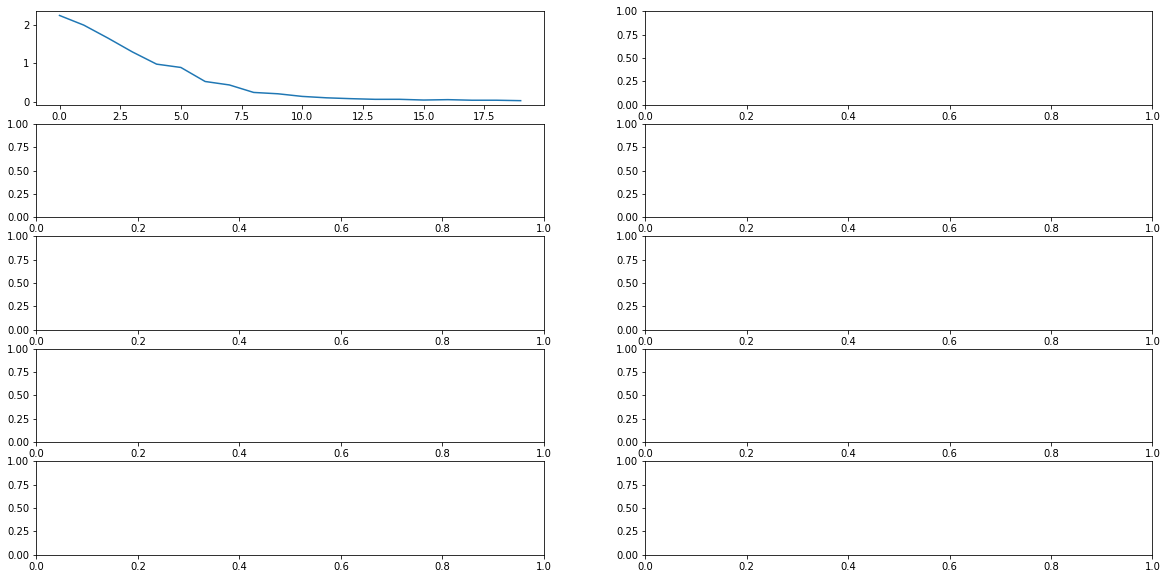

In [ ]:
fig, axs = plt.subplots(5, 2, figsize=(20, 10))
for i in range(0,10):
  if i < int(10/2):
    axs[i, 0].plot(Total_valid_loss[i])
    axs[i, 0].plot(Total_test_loss[i])
  else:
    axs[i-int(10/2), 1].plot(Total_valid_loss[i])
    axs[i-int(10/2), 1].plot(Total_test_loss[i])
plt.legend(['Train Loss','Test Loss'])

In [ ]:
df_loss_accuracy_crossval

,Train Loss,Train Accuracy,Val Loss,Val Accuracy,Test Loss,Test Accuracy
0,0.000027,1.0,0.000614,1.0,3.386951,0.36514524
1,0.000129,1.0,0.000188,1.0,2.838575,0.4813278
2,0.000028,1.0,0.000025,1.0,4.075721,0.373444
3,0.028092,0.99115044,0.066905,1.0,1.920424,0.37759337
4,0.000022,1.0,0.000022,1.0,3.745028,0.41493776
5,0.000034,1.0,0.000043,1.0,2.867160,0.49377593
6,0.000022,1.0,0.000016,1.0,2.948827,0.48547718
7,0.047629,0.9649123,0.063618,1.0,1.703324,0.3153527
8,0.000014,1.0,0.698461,0.9166667,3.154973,0.34024897
9,0.000024,1.0,0.283157,0.9166667,3.038667,0.40248963


In [ ]:
overall_df_loss_accuracy_crossval

,Train Accuracy,Val Accuracy,Test Accuracy
0,1.0,1.0,0.38589212
1,1.0,1.0,0.48547718
2,1.0,1.0,0.373444
3,0.99115044,1.0,0.37759337
4,1.0,1.0,0.48962656
5,1.0,1.0,0.49377593
6,1.0,1.0,0.48547718
7,0.9649123,1.0,0.3153527
8,1.0,0.9166667,0.35684648
9,1.0,0.9166667,0.406639


In [ ]:
overall_df_loss_accuracy_crossval.mean(axis=0)

Train Accuracy    0.999425
Val Accuracy      0.992308
Test Accuracy     0.690226
dtype: float64

In [ ]:
epochs = 150; lr = 0.00001;
current_random_number = 2021

# df_loss_accuracy_crossval = pd.DataFrame(columns=['Train Loss', 'Train Accuracy', 'Val Loss', 'Val Accuracy', 'Test Loss', 'Test Accuracy'])
# overall_df_loss_accuracy_crossval = pd.DataFrame(columns=['Train Accuracy', 'Val Accuracy', 'Test Accuracy', 'Test Accuracy Equal Weight'])
Total_valid_loss = []
Total_test_loss = []

def validation_metrics (model, valid_dl, class_weights):
  model.eval()
  test_correct = 0
  test_total = 0
  test_sum_loss = 0.0
  test_sum_rmse = 0.0
  actual_label = []
  predicted_label = []
  for x, y, l in valid_dl:
      x = x.float()
      x.resize_((1,x.shape[0],x.shape[1]))
      indv_class_weight = class_weights[y]
      # indv_class_weight = 1
      y = torch.tensor(y).long().resize_((1))
      # y_hat = model(x, l)
      y_hat = model(x)
      loss = F.cross_entropy(y_hat, y)
      pred = torch.max(y_hat, 1)[1]
      # print(y, pred)
      test_correct += (pred == y).float().sum()
      test_total += y.shape[0]
      test_sum_loss += loss.item()*indv_class_weight*y.shape[0]
      test_sum_rmse += np.sqrt(mean_squared_error(pred, y.unsqueeze(-1)))*y.shape[0]
      actual_label.extend(y.numpy())
      predicted_label.extend(pred.numpy())
  conf_mat = confusion_matrix(actual_label, predicted_label)
  Equal_Weight_Nest_Acc = Nest_Equal_weight_accuracy(conf_mat)
  # print(conf_mat)
  return test_sum_loss/test_total, test_correct/test_total, test_sum_rmse/test_total, conf_mat, Equal_Weight_Nest_Acc

def Nest_Equal_weight_accuracy(confusion_matrix):
  Nest_sum = confusion_matrix.sum(axis=1)
  Indv_Nest_Acc = [];
  for i in range(0, Nest_sum.shape[0]):
    Indv_Nest_Acc.append(confusion_matrix[i, i]/Nest_sum[i])
    # print(confusion_matrix[i, i]/Nest_sum[i])
  return np.mean(Indv_Nest_Acc)

encoded_targets, le = data_splitting_based_on_sample_size(Tutor_dataset)        ###  CHANGE HERE FOR TUTOR OR PUPIL DATASET TRAINING
encoded_targets = encoded_targets.sample(frac=1, random_state=current_random_number).reset_index(drop=True)

X_total = []; y_total = [];

for key in encoded_targets['key'].unique():
  data, label = create_sequence_feature(syllable_df_Nest_Total, key, le, label_select='Nest')
  X_total.append(data)
  y_total.append(label)

train_ds = ReviewsDataset(X_total, y_total)

for current_random_number in random_number_set[:15]:
  print(current_random_number)

  model =  LSTM_fixed_len(1024, 64, len(le.classes_), 1)   ### SET MODEL ARCHITECTURE HERE
  # model =  LSTM_fixed_len_bidir(1024, 512, len(le.classes_), 2)
  print(model.eval())
  parameters = filter(lambda p: p.requires_grad, model.parameters())
  optimizer = torch.optim.Adam(parameters, lr=lr)
  model.train()

  epoch_best_loss = 0
  epoch_best_acc = 0
  epoch_best_val_loss = 0
  epoch_best_val_acc = 0
  overall_best_model_train_acc = 0
  best_model_test_acc = 0
  best_model_test_acc = 0
  best_model_test_acc_equal_weight = 0

  overall_best_model_stats = []
  valid_loss_iter = []
  test_loss_iter = []

  encoded_targets_test, le_test = data_splitting_based_on_sample_size(Pupil_dataset)
  # encoded_targets_test, le_test = data_splitting_based_on_sample_size(Tutor_dataset)

  X_test = []; y_test = [];
  
  print('Scrambling test sequence')
  for key in encoded_targets_test['key'].unique():# [:10]:
      # print(key)
      # data, label = create_sequence_feature(Tutor_dataset, key, le, label_select='Nest')
      data, label = create_sequence_feature_randomize(Pupil_dataset, key, le, label_select='Nest', random_state=current_random_number)
      X_test.append(data)
      y_test.append(label)

  test_ds = ReviewsDataset(X_test, y_test)

  for i in range(epochs):
    model.train()
    epoch_loss = 0
    epoch_acc = 0    
    train_correct = 0
    train_total = 0
    for iter, (x, y, l) in enumerate(train_ds):
        x = x.float()
        x.resize_((1,x.shape[0],x.shape[1]))
        indv_class_weight = class_weights[y]
        # indv_class_weight = 1
        y = torch.tensor(y).long().resize_((1))
        # y_pred = model(x, l)
        y_pred = model(x)
        optimizer.zero_grad()
        loss = F.cross_entropy(y_pred, y)*indv_class_weight
        # print(loss, indv_class_weight, loss*indv_class_weight)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()*y.shape[0]
        train_total += y.shape[0]
        pred_train = torch.max(y_pred, 1)[1]
        train_correct += (pred_train == y).float().sum()          
    epoch_loss /= (iter + 1)
    epoch_acc = train_correct/train_total  
    val_epoch_loss, val_accuracy, val_rmse, val_conf_mat, val_acuracy_equal_weight = validation_metrics(model, train_ds, class_weights)
    valid_loss_iter.append(val_epoch_loss)

    test_epoch_loss, test_accuracy, test_rmse, test_conf_mat, test_accuracy_equal_weight = validation_metrics(model, test_ds, class_weights)
    test_loss_iter.append(test_epoch_loss)
  
    print("Epoch %d, train loss %.3f, train accuracy %.3f, val loss %.3f, val accuracy %.3f, test loss %.3f, test accuracy %.3f" % (i, epoch_loss, epoch_acc, val_epoch_loss, val_accuracy, test_epoch_loss, test_accuracy))

    if epoch_best_acc <= epoch_acc:
      if epoch_best_val_acc <= val_accuracy:
        epoch_best_val_loss = val_epoch_loss
        epoch_best_loss = epoch_loss
        epoch_best_acc = epoch_acc
        epoch_best_val_acc = val_accuracy
        epoch_best_val_acc_equal_weight = val_acuracy_equal_weight
        test_accuracy_temp = test_accuracy
        test_accuracy_temp_equal_weight = test_accuracy_equal_weight
        test_epoch_loss_temp = test_epoch_loss
        now = datetime.now() 
        dt_string = now.strftime("%d_%m_%Y_%H_%M")
        best_model = model
        print('Saving overall best train val model')        
        if best_model_test_acc <= test_accuracy:
          best_model_test_acc = test_accuracy
          best_model_test_acc_equal_weight = test_accuracy_equal_weight
          best_model_test_loss = test_epoch_loss
          overall_best_model = model
          overall_best_model_train_acc = epoch_acc
          overall_best_model_stats = [ epoch_best_acc.numpy(), epoch_best_val_acc.numpy(), best_model_test_acc.numpy(), best_model_test_acc_equal_weight]
          overall_best_test_conf_matrix = pd.DataFrame(test_conf_mat, index=[class_label+'_True' for class_label in list(le.classes_)], columns=[class_label+'_Pred' for class_label in list(le.classes_)])
          overall_best_valid_conf_matrix = pd.DataFrame(val_conf_mat, index=[class_label+'_True' for class_label in list(le.classes_)], columns=[class_label+'_Pred' for class_label in list(le.classes_)])
          print('Saving overall best test model')
        elif overall_best_model_train_acc < epoch_acc:
          best_model_test_acc = test_accuracy
          best_model_test_acc_equal_weight = test_accuracy_equal_weight
          best_model_test_loss = test_epoch_loss
          overall_best_model = model
          overall_best_model_train_acc = epoch_acc
          overall_best_model_stats = [ epoch_best_acc.numpy(), epoch_best_val_acc.numpy(), best_model_test_acc.numpy(), best_model_test_acc_equal_weight]
          overall_best_test_conf_matrix = pd.DataFrame(test_conf_mat, index=[class_label+'_True' for class_label in list(le.classes_)], columns=[class_label+'_Pred' for class_label in list(le.classes_)])
          overall_best_valid_conf_matrix = pd.DataFrame(val_conf_mat, index=[class_label+'_True' for class_label in list(le.classes_)], columns=[class_label+'_Pred' for class_label in list(le.classes_)])
          print('Replacing overall best test model')

  Total_valid_loss.append(valid_loss_iter)
  Total_test_loss.append(test_loss_iter)

  actual_label = []
  predicted_label = []
  predicted_label_name = []

  for x, y, l in test_ds:
    x = x.float()
    x.resize_((1,x.shape[0],x.shape[1]))
    # indv_class_weight = class_weights[y]
    y = torch.tensor(y).long().resize_((1))
    y_hat = model(x)
    pred = torch.max(y_hat, 1)[1]
    actual_label.extend(y.numpy())
    predicted_label.extend(pred.numpy())
    # print(y.numpy(), pred.numpy())
    predicted_label_name.extend(le.inverse_transform(pred.numpy()).tolist())
  conf_mat = confusion_matrix(actual_label, predicted_label)

  encoded_targets_test["Nest Pred"] = predicted_label_name

  PupilID_Nest = np.zeros(shape=(len(encoded_targets_test['indvi'].unique()), len(encoded_targets_test['Nest'].unique())), dtype=int )

  counter = 0;
  PupilID_Nest_Names = []
  for indvi in encoded_targets_test['indvi'].unique():
    current_Bird = encoded_targets_test.loc[encoded_targets_test['indvi']==indvi]
    PupilID_Nest_Names.extend([str(indvi)+'_'+str(current_Bird['Nest'].values[-1])])
    # print(counter, [str(indvi)+'_'+str(current_Bird['Nest'].values[-1])], len(current_Bird['key']))
    for key in current_Bird['key'].unique():
      # print(key, counter, int(le.transform(current_Bird['Nest Pred'].loc[current_Bird['key']==key].values)) , PupilID_Nest[counter][int(le.transform(current_Bird['Nest Pred'].loc[current_Bird['key']==key].values))])
      PupilID_Nest[counter][int(le.transform(current_Bird['Nest Pred'].loc[current_Bird['key']==key].values))] += 1
    counter += 1

  PupilID_Nest_df = pd.DataFrame(PupilID_Nest, index=PupilID_Nest_Names, columns=[class_label+'_Pred' for class_label in list(le.classes_)])

  df_loss_accuracy_crossval = df_loss_accuracy_crossval.append({'Train Loss': epoch_best_loss , 'Train Accuracy': epoch_best_acc.numpy(),  'Val Loss':  epoch_best_val_loss, 
                                          'Val Accuracy': epoch_best_val_acc.numpy(), 'Test Loss': test_epoch_loss_temp, 'Test Accuracy': test_accuracy_temp.numpy()}, ignore_index=True)

  overall_df_loss_accuracy_crossval = overall_df_loss_accuracy_crossval.append(pd.Series(overall_best_model_stats, index=overall_df_loss_accuracy_crossval.columns.values), ignore_index=True)

  print('Saving PupilID Nest for seq', str(current_random_number))
  PupilID_Nest_df.to_csv('/content/gdrive/My Drive/ZFDataset/SavedModels/FullDataset/LSTM/Unidirectional/Randomize/'+'PupilID_Nest_'+str(current_random_number)+'.csv')
overall_df_loss_accuracy_crossval.to_csv('/content/gdrive/My Drive/ZFDataset/SavedModels/FullDataset/LSTM/Unidirectional/Randomize/'+'ScrambleSeq'+'.csv')

  # torch.save(model, '/content/gdrive/My Drive/ZFDataset/SavedModels/FullDataset/LSTM/Unidirectional/Randomize/'+'Total'+dt_string+'_Train_'+str(np.round(epoch_best_acc.numpy(),4))+
  #                                                                                    '_Val_'+str(np.round(epoch_best_val_acc.numpy(),4))+'_Test_'+str(np.round(best_model_test_acc.numpy(),4)))

Streaming output truncated to the last 5000 lines.
Saving overall best train val model
Epoch 106, train loss 0.009, train accuracy 1.000, val loss 0.009, val accuracy 1.000, test loss 0.748, test accuracy 0.532
Saving overall best train val model
Epoch 107, train loss 0.009, train accuracy 1.000, val loss 0.009, val accuracy 1.000, test loss 0.748, test accuracy 0.532
Saving overall best train val model
Epoch 108, train loss 0.009, train accuracy 1.000, val loss 0.008, val accuracy 1.000, test loss 0.749, test accuracy 0.531
Saving overall best train val model
Epoch 109, train loss 0.008, train accuracy 1.000, val loss 0.008, val accuracy 1.000, test loss 0.746, test accuracy 0.532
Saving overall best train val model
Epoch 110, train loss 0.008, train accuracy 1.000, val loss 0.008, val accuracy 1.000, test loss 0.746, test accuracy 0.534
Saving overall best train val model
Epoch 111, train loss 0.008, train accuracy 1.000, val loss 0.007, val accuracy 1.000, test loss 0.744, test accu

In [ ]:
df_loss_accuracy_crossval

,Train Loss,Train Accuracy,Val Loss,Val Accuracy,Test Loss,Test Accuracy
0,0.002029,1.0,0.001981,1.0,0.746616,0.54389316
1,0.003702,1.0,0.003634,1.0,0.951716,0.47519085


In [ ]:
overall_df_loss_accuracy_crossval

,Train Accuracy,Val Accuracy,Test Accuracy,Test Accuracy Equal Weight
0,1.0,1.0,0.5515267,0.435471
1,1.0,1.0,0.48282441,0.410030


In [ ]:
import matplotlib.pyplot as plt

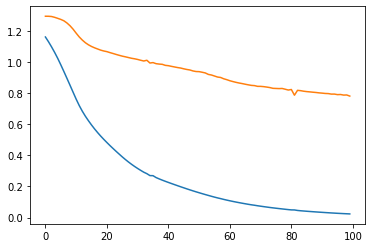

In [ ]:
plt.plot(Total_valid_loss[0])
plt.plot(Total_test_loss[0])

In [ ]:
from os import walk

In [ ]:
search_path = '/content/gdrive/My Drive/ZFDataset/SavedModels/Final Architecture/LSTM/Unidirectional'
_, _, filenames = next(walk(search_path))

In [ ]:
Accuracy_Table = pd.DataFrame(columns=['Train Accuracy', 'Val Accuracy', 'Test Accuracy'])

for file in filenames:
  if 'Accuracy_Table_Test' in file:
    print(file)
    Acc_data = pd.read_csv(search_path+file, index_col=False)
    Acc_data = Acc_data.drop(columns=['Unnamed: 0'])
    Accuracy_Table = Accuracy_Table.append(pd.Series(Acc_data.mean(axis=0).values, index=Accuracy_Table.columns.values), ignore_index=True)

Accuracy_Table_Test_Random_3859.csv
Accuracy_Table_Test_Random_7857.csv
Accuracy_Table_Test_Random_7980.csv
Accuracy_Table_Test_Random_2999.csv
Accuracy_Table_Test_Random_3324.csv
Accuracy_Table_Test_Random_1778.csv
Accuracy_Table_Test_Random_329.csv
Accuracy_Table_Test_Random_5689.csv
Accuracy_Table_Test_Random_2746.csv
Accuracy_Table_Test_Random_8964.csv
Accuracy_Table_Test_Random_70.csv
Accuracy_Table_Test_Random_4786.csv
Accuracy_Table_Test_Random_2816.csv
Accuracy_Table_Test_Random_2405.csv
Accuracy_Table_Test_Random_2681.csv
Accuracy_Table_Test_Random_5769.csv
Accuracy_Table_Test_Random_9327.csv
Accuracy_Table_Test_Random_7867.csv
Accuracy_Table_Test_Random_4469.csv
Accuracy_Table_Test_Random_4928.csv
Accuracy_Table_Test_Random_5730.csv
Accuracy_Table_Test_Random_858.csv
Accuracy_Table_Test_Random_6775.csv
Accuracy_Table_Test_Random_5487.csv
Accuracy_Table_Test_Random_1464.csv
Accuracy_Table_Test_Random_7365.csv
Accuracy_Table_Test_Random_4313.csv
Accuracy_Table_Test_Random_9324.

In [ ]:
Accuracy_Table = pd.read_csv('/content/gdrive/My Drive/ZFDataset/SavedModels/Final Architecture/LSTM/Unidirectional/Accuracy_Table_Test_Random_5397.csv')

In [ ]:
Accuracy_Table.std(axis=0).values

array([0.00021483, 0.00049243, 0.00398278])

In [ ]:
def train_model(model, kf, class_weights, epochs=10, lr=0.001):
  parameters = filter(lambda p: p.requires_grad, model.parameters())
  optimizer = torch.optim.Adam(parameters, lr=lr)
  for i in range(epochs):
    model.train()
    sum_loss = 0.0
    correct_train = 0
    total = 0
    sum_val_loss = 0.0
    sum_val_acc = 0.0
    sum_val_rmse = 0.0
    for _fold, (train_index, val_index) in enumerate(kf.split(range(len(X_train)))):
      X_train_subset = []; y_train_subset = [];
      X_val_subset = []; y_val_subset = [];
      for indx in train_index:
        X_train_subset.append(X_train[indx])
        y_train_subset.append(y_train[indx])
      train_ds = ReviewsDataset(X_train_subset, y_train_subset)
      for indx in val_index:
        X_val_subset.append(X_train[indx])
        y_val_subset.append(y_train[indx])
      valid_ds = ReviewsDataset(X_val_subset, y_val_subset)
      for x, y, l in train_ds:
          x = x.float()
          x.resize_((1,x.shape[0],x.shape[1]))
          indv_class_weight = class_weights[y]
          y = torch.tensor(y).long().resize_((1))
          # y_pred = model(x, l)
          y_pred = model(x)
          optimizer.zero_grad()
          loss = F.cross_entropy(y_pred, y)*indv_class_weight
          # print(loss, indv_class_weight, loss*indv_class_weight)
          loss.backward()
          optimizer.step()
          sum_loss += loss.item()*y.shape[0]
          total += y.shape[0]
          pred_train = torch.max(y_pred, 1)[1]
          correct_train += (pred_train == y).float().sum()
      val_loss, val_acc, val_rmse = validation_metrics(model, valid_ds, class_weights)
      sum_val_loss += val_loss
      sum_val_acc += val_acc
      sum_val_rmse += val_rmse
    # if i % 5 == 0:
      # print(i)
    print("Epoch %d, train loss %.3f, train accuracy %.3f, val loss %.3f, val accuracy %.3f, and val rmse %.3f" % (i, sum_loss/((_fold+1)*total), correct_train/total, sum_val_loss/(_fold+1), sum_val_acc/(_fold+1), val_rmse/(_fold+1)))
  return (sum_loss/((_fold+1)*total)), (correct_train/total), (sum_val_loss/(_fold+1)), (sum_val_acc/(_fold+1))

def validation_metrics (model, valid_dl, class_weights):
    model.eval()
    correct = 0
    total = 0
    sum_loss = 0.0
    sum_rmse = 0.0
    for x, y, l in valid_dl:
        x = x.float()
        x.resize_((1,x.shape[0],x.shape[1]))
        indv_class_weight = class_weights[y]
        y = torch.tensor(y).long().resize_((1))
        # y_hat = model(x, l)
        y_hat = model(x)
        loss = F.cross_entropy(y_hat, y)
        pred = torch.max(y_hat, 1)[1]
        # print(y, pred)
        correct += (pred == y).float().sum()
        total += y.shape[0]
        sum_loss += loss.item()*indv_class_weight*y.shape[0]
        sum_rmse += np.sqrt(mean_squared_error(pred, y.unsqueeze(-1)))*y.shape[0]
    return sum_loss/total, correct/total, sum_rmse/total

In [ ]:
pwd

'/content/gdrive/My Drive/ZFDataset'

In [ ]:
model = torch.load('/content/gdrive/My Drive/ZFDataset/SavedModels/LSTM_Fold0_10_05_2021_19_07')

In [ ]:
for x, y, l in train_ds:
  x = x.float()
  x.resize_((1,x.shape[0],x.shape[1]))
  indv_class_weight = class_weights[y]
  y = torch.tensor(y).long().resize_((1))
  # y_pred = model(x, l)
  y_pred = model(x)
  pred_train = torch.max(y_pred, 1)[1]
  # print(y_pred)
  print(y, pred_train)

tensor([0]) tensor([0])
tensor([4]) tensor([4])
tensor([0]) tensor([0])
tensor([2]) tensor([2])
tensor([3]) tensor([3])
tensor([3]) tensor([3])
tensor([2]) tensor([2])
tensor([2]) tensor([2])
tensor([3]) tensor([3])
tensor([0]) tensor([0])
tensor([4]) tensor([4])
tensor([1]) tensor([1])
tensor([1]) tensor([1])
tensor([3]) tensor([3])
tensor([2]) tensor([2])
tensor([2]) tensor([2])
tensor([4]) tensor([4])
tensor([3]) tensor([3])
tensor([1]) tensor([1])
tensor([4]) tensor([4])
tensor([3]) tensor([3])
tensor([3]) tensor([3])
tensor([3]) tensor([3])
tensor([4]) tensor([4])
tensor([2]) tensor([2])
tensor([4]) tensor([4])
tensor([4]) tensor([4])
tensor([4]) tensor([4])
tensor([4]) tensor([4])
tensor([3]) tensor([3])
tensor([4]) tensor([4])
tensor([2]) tensor([2])
tensor([2]) tensor([2])
tensor([2]) tensor([2])
tensor([3]) tensor([3])
tensor([2]) tensor([2])
tensor([2]) tensor([2])
tensor([3]) tensor([3])
tensor([3]) tensor([3])
tensor([2]) tensor([2])
tensor([3]) tensor([3])
tensor([4]) tens

In [ ]:
# batch_size = 50
# train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
# val_dl = DataLoader(valid_ds, batch_size=batch_size)

In [ ]:
model_fixed =  LSTM_fixed_len(1024, 10, 4)
# model_fixed =  LSTM_fixed_len(100, 50, 50)

In [ ]:
model_fixed

LSTM_fixed_len(
  (lstm): LSTM(1024, 10, batch_first=True)
  (linear): Linear(in_features=10, out_features=4, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)

In [ ]:
# loss = nn.CrossEntropyLoss()
# input = torch.randn(3, 5, requires_grad=True)
# target = torch.empty(3, dtype=torch.long).random_(5)
# output = loss(input, target)
# output.backward()

In [ ]:
train_loss, train_accuracy, val_loss, val_accuracy =  train_model(model_fixed, kf, class_weights, epochs=2, lr=0.001)

Epoch 0, train loss 0.001, train accuracy 0.997, val loss 0.002, val accuracy 1.000, and val rmse 0.000
Epoch 1, train loss 0.001, train accuracy 0.997, val loss 0.001, val accuracy 1.000, and val rmse 0.000


In [ ]:
test_ds = ReviewsDataset(X_test, y_test)

In [ ]:
test_loss, test_correct, test_rmse = validation_metrics(model_fixed, test_ds)
print("Test loss %.3f, Test Accuracy %.3f, Test RMSE %.3f" %(test_loss, test_correct, test_rmse))

Test loss 0.083, Test Accuracy 0.986, Test RMSE 0.014


In [ ]:
X_train

[[[array([3.6964213e-04, 6.1388216e-03, 2.3623325e-03, ..., 5.9952104e-01,
          4.7096276e-01, 6.7699389e-03], dtype=float32),
   array([3.9546576e-04, 4.2689457e-03, 2.1646945e-03, ..., 1.0832235e+00,
          5.0408190e-01, 8.0454396e-04], dtype=float32),
   array([4.3923515e-04, 3.5873966e-03, 2.3025582e-03, ..., 4.5419684e-01,
          9.9826270e-01, 5.8748936e-03], dtype=float32),
   array([4.8858119e-04, 5.5127405e-03, 1.7675881e-03, ..., 2.6316303e-01,
          6.5507305e-01, 0.0000000e+00], dtype=float32),
   array([4.0706727e-04, 4.3425970e-03, 1.8088806e-03, ..., 6.8255633e-02,
          9.7876644e-01, 0.0000000e+00], dtype=float32),
   array([3.6909830e-04, 7.3469197e-03, 2.3746886e-03, ..., 5.4688144e-01,
          7.2352040e-01, 7.7279314e-02], dtype=float32),
   array([4.8456003e-04, 3.6201791e-03, 2.1676929e-03, ..., 1.2960277e-01,
          9.3385494e-01, 4.3036998e-03], dtype=float32),
   array([0.00049007, 0.00513859, 0.00200676, ..., 0.47218606, 0.48447147,
 

In [ ]:
num_experiment_repeat = 100
num_epoch = 50
kf = KFold(n_splits  = 5)

df_loss_accuracy = pd.DataFrame(columns=['Train Loss', 'Train Accuracy', 'Val Loss', 'Val Accuracy', 'Test Loss', 'Test Accuracy'])
for iter in range(num_experiment_repeat):
  print('\n Iteration number :', iter)
  encoded_targets, train_keys, test_keys, le = data_splitting_based_on_sample_size(syllable_df_Nest_Total, train_test_split_ratio = 0.5)

  num_occurences = encoded_targets.groupby('indvi').nunique()
  class_weights = num_occurences['key'].min()/num_occurences['key'].values

  X_train = []; X_test =[];
  y_train = []; y_test =[];

  for key in encoded_targets['key'].unique():# [:10]:
      data, label = create_sequence_feature(syllable_df_Nest_Total, key, le)
      if key in train_keys:
        X_train.append(data)
        y_train.append(label)
      elif key in test_keys:
        X_test.append(data)
        y_test.append(label)
      else:
        print(key, "Not Found")

  model_fixed =  LSTM_fixed_len(1024, 10, 4)

  train_loss, train_accuracy, val_loss, val_accuracy =  train_model(model_fixed, kf, class_weights, epochs=num_epoch, lr=0.001)

  test_ds = ReviewsDataset(X_test, y_test)

  test_loss, test_accuracy, test_rmse = validation_metrics(model_fixed, test_ds, class_weights)

  df_loss_accuracy = df_loss_accuracy.append({'Train Loss': train_loss , 'Train Accuracy': train_accuracy.numpy(),  'Val Loss':  val_loss, 
                                            'Val Accuracy': val_accuracy.numpy(),'Test Loss': test_loss, 'Test Accuracy': test_accuracy.numpy()} , ignore_index=True)
  df_loss_accuracy.to_csv(base_path+'/Results/'+Nest_analysis+'_'+'Backup_if_terminate.csv')

now = datetime.now() 
dt_string = now.strftime("%d_%m_%Y_%H_%M")
df_loss_accuracy.to_csv(base_path+'/Results/'+Nest_analysis+'_'+dt_string+'.csv')

Streaming output truncated to the last 5000 lines.
Epoch 42, train loss 0.002, train accuracy 0.984, val loss 0.005, val accuracy 1.000, and val rmse 0.000
Epoch 43, train loss 0.001, train accuracy 1.000, val loss 0.005, val accuracy 1.000, and val rmse 0.000
Epoch 44, train loss 0.001, train accuracy 0.984, val loss 0.004, val accuracy 1.000, and val rmse 0.000
Epoch 45, train loss 0.001, train accuracy 0.997, val loss 0.003, val accuracy 1.000, and val rmse 0.000
Epoch 46, train loss 0.001, train accuracy 1.000, val loss 0.004, val accuracy 1.000, and val rmse 0.000
Epoch 47, train loss 0.001, train accuracy 0.997, val loss 0.003, val accuracy 1.000, and val rmse 0.000
Epoch 48, train loss 0.002, train accuracy 0.984, val loss 0.005, val accuracy 1.000, and val rmse 0.000
Epoch 49, train loss 0.001, train accuracy 0.997, val loss 0.003, val accuracy 1.000, and val rmse 0.000

 Iteration number : 4
Epoch 0, train loss 0.053, train accuracy 0.218, val loss 0.277, val accuracy 0.243, a

In [ ]:
# path = pwd+'/Results/'+Nest_analysis+'_'+dt_string+'.csv'
df_loss_accuracy.to_csv(base_path+'/Results/'+Nest_analysis+'_'+dt_string+'.csv')

In [ ]:
df_loss_accuracy

,Train Loss,Train Accuracy,Val Loss,Val Accuracy,Test Loss,Test Accuracy
0,0.262133,0.3181818,1.340543,0.21333334,1.263984,0.2820513
1,0.253577,0.3961039,1.308524,0.41333333,1.186756,0.41025642


In [ ]:
df_loss_accuracy

,Train Loss,Train Accuracy,Val Loss,Val Accuracy,Test Loss,Test Accuracy
0,0.262133,0.3181818,1.340543,0.21333334,1.263984,0.2820513
1,0.253577,0.3961039,1.308524,0.41333333,1.186756,0.41025642


In [ ]:
train_accuracy

tensor(0.3312)

In [ ]:
# model_fixed(torch.randn(24, 153, 1024))

In [ ]:
# model_fixed(x.float())

In [ ]:
for x, y, l in valid_ds:
  x = x.float()
  x.resize_((1,x.shape[0],x.shape[1]))
  y = torch.tensor(y).long().resize_((1))
  # y_hat = model(x, l)
  y_hat = model_fixed(x)
  # loss = F.cross_entropy(y_hat, y)
  pred = torch.max(y_hat, 1)[1]
  print(y, pred)

NameError: ignored

In [ ]:
Hidden_layer =[]
Hidden_layer_labels = []

for x, y, l in train_ds:
  x = x.float()
  x.resize_((1,x.shape[0],x.shape[1]))
  lstm_out, (ht, ct) = model_fixed.lstm(x)
  Hidden_layer.append(ht[-1].detach().numpy().reshape(10, ))
  Hidden_layer_labels.append(y)

for x, y, l in test_ds:
  x = x.float()
  x.resize_((1,x.shape[0],x.shape[1]))
  lstm_out, (ht, ct) = model_fixed.lstm(x)
  Hidden_layer.append(ht[-1].detach().numpy().reshape(10, ))
  Hidden_layer_labels.append(y)

In [ ]:
ht

tensor([[[-9.9999e-01,  1.0147e-08, -9.9955e-01,  6.4942e-04,  3.7315e-01,
           4.5323e-08, -7.9513e-04,  1.0000e+00,  1.0000e+00, -1.0000e+00]]],
       grad_fn=<StackBackward>)

In [ ]:
Hidden_layer[0]

array([-0.9911277 , -0.9362339 , -0.7752966 ,  0.50072587,  0.9896477 ,
        0.9077447 ,  0.9980349 ,  0.9107824 ,  0.9619196 ,  0.9484187 ],
      dtype=float32)

In [ ]:
len(Hidden_layer)

139

In [ ]:
len(Hidden_layer_labels)

139

In [ ]:
hover_data = pd.DataFrame(le.inverse_transform((Hidden_layer_labels)), columns=['key'])

In [ ]:
pip install umap-learn

     |████████████████████████████████| 81kB 3.1MB/s 
     |████████████████████████████████| 1.2MB 6.6MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.1-cp37-none-any.whl size=76569 sha256=6dc5c8dff4b64c64464445774d9fc842aacf7f6cdb835c3aab563f6ed4618a3c
  Stored in directory: /root/.cache/pip/wheels/ad/df/d5/a3691296ff779f25cd1cf415a3af954b987fb53111e3392cf4
  Created wheel for pynndescent: filename=pynndescent-0.5.2-cp37-none-any.whl size=51351 sha256=5b4c82bb46fd848d386121cb00487da386ff653248801f5097b38859c4778049
  Stored in directory: /root/.cache/pip/wheels/ba/52/4e/4c28d04d144a28f89e2575fb63628df6e6d49b56c5ddd0c74e
Successfully built umap-learn pynndescent


In [ ]:
import umap.umap_ as umap

In [ ]:
embedding = umap.UMAP(n_neighbors = 100, min_dist=0.05,  densmap=True).fit(Hidden_layer)

In [ ]:
pip install umap-learn[plot]

     |████████████████████████████████| 15.8MB 428kB/s 
     |████████████████████████████████| 81kB 6.8MB/s 
     |████████████████████████████████| 706kB 43.8MB/s 
     |████████████████████████████████| 112kB 35.2MB/s 
  Created wheel for datashape: filename=datashape-0.5.2-cp37-none-any.whl size=59430 sha256=55efdcedf42cd46915b5467590e8452b258e290cf5407bbde27abf9510ebbcdf
  Stored in directory: /root/.cache/pip/wheels/8d/06/05/c1cba3d57bdcfd3960e3f60a9fdc97e4baef2ef09af0ad1ef8
Successfully built datashape
ERROR: distributed 2021.4.1 has requirement cloudpickle>=1.5.0, but you'll have cloudpickle 1.3.0 which is incompatible.
ERROR: distributed 2021.4.1 has requirement dask>=2021.03.0, but you'll have dask 2.12.0 which is incompatible.
  Found existing installation: distributed 1.25.3
    Uninstalling distributed-1.25.3:
      Successfully uninstalled distributed-1.25.3


In [ ]:
import umap.plot
umap.plot.output_notebook()

In [ ]:
p = umap.plot.interactive(embedding, labels=Hidden_layer_labels, hover_data=hover_data, point_size=4) #title ='Nest1')
umap.plot.show(p)

In [ ]:
model_fixed.linear(ht[-1])

tensor([[-3.6353, -0.1723,  0.8973,  2.1575]], grad_fn=<AddmmBackward>)

In [ ]:
y

tensor([3])

In [ ]:
h

tensor([[[ 1.0000e+00,  4.5915e-02, -1.4943e-04, -1.0000e+00, -8.0883e-08,
          -1.0000e+00, -1.0972e+01,  9.7265e-10, -1.0990e+01,  1.0000e+00]],

        [[-3.3179e+00, -3.9732e-01, -3.3076e-01, -6.4713e-01, -1.0976e+00,
          -6.7902e-02, -1.1187e+00,  1.1220e+00,  2.8348e+00,  5.2127e-01]]],
       grad_fn=<StackBackward>)

In [ ]:
embeddings = nn.Embedding(1024, 4, padding_idx = 0)

In [ ]:
temp = embeddings(torch.tensor(np.zeros((10,1024))).long())

In [ ]:
temp

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         ...,
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         ...,
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         ...,
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        ...,

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         ...,
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         ...,
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         ...,
 

In [ ]:
model_fixed(temp)

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         ...,
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         ...,
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         ...,
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        ...,

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         ...,
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         ...,
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         ...,
 

RuntimeError: ignored

In [ ]:
current_songfile = syllable_df_Nest_Total.loc[syllable_df_Nest_Total['key']=='cyea_0000']

In [ ]:
sequence_length = current_songfile['indvi'].values[-1]

In [ ]:
temp_list = current_songfile['densenet121_features'].to_list()

In [ ]:
temp_list.append()

[array([3.6964213e-04, 6.1388216e-03, 2.3623325e-03, ..., 5.9952104e-01,
        4.7096276e-01, 6.7699389e-03], dtype=float32),
 array([3.9546576e-04, 4.2689457e-03, 2.1646945e-03, ..., 1.0832235e+00,
        5.0408190e-01, 8.0454396e-04], dtype=float32),
 array([4.3923515e-04, 3.5873966e-03, 2.3025582e-03, ..., 4.5419684e-01,
        9.9826270e-01, 5.8748936e-03], dtype=float32),
 array([4.8858119e-04, 5.5127405e-03, 1.7675881e-03, ..., 2.6316303e-01,
        6.5507305e-01, 0.0000000e+00], dtype=float32),
 array([4.0706727e-04, 4.3425970e-03, 1.8088806e-03, ..., 6.8255633e-02,
        9.7876644e-01, 0.0000000e+00], dtype=float32),
 array([3.6909830e-04, 7.3469197e-03, 2.3746886e-03, ..., 5.4688144e-01,
        7.2352040e-01, 7.7279314e-02], dtype=float32),
 array([4.8456003e-04, 3.6201791e-03, 2.1676929e-03, ..., 1.2960277e-01,
        9.3385494e-01, 4.3036998e-03], dtype=float32),
 array([0.00049007, 0.00513859, 0.00200676, ..., 0.47218606, 0.48447147,
        0.        ], dtype=floa

In [ ]:
for k in range(sequence_length,20):
  temp_list.append(np.zeros(len(temp_list[0])))

In [ ]:
torch.tensor(temp_list)

tensor([[3.6964e-04, 6.1388e-03, 2.3623e-03,  ..., 5.9952e-01, 4.7096e-01,
         6.7699e-03],
        [3.9547e-04, 4.2689e-03, 2.1647e-03,  ..., 1.0832e+00, 5.0408e-01,
         8.0454e-04],
        [4.3924e-04, 3.5874e-03, 2.3026e-03,  ..., 4.5420e-01, 9.9826e-01,
         5.8749e-03],
        ...,
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00]], dtype=torch.float64)

In [ ]:
np.zeros((2, len(temp_list[0])))

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
feature_set = []
for feat in current_songfile['densenet121_features']:
  feature_set.append(create_sequence_feature(feat))
# current_songfile['densenet121_features'].to_list()

TypeError: ignored

In [ ]:
torch.tensor(current_songfile['densenet121_features'].to_list())

tensor([[3.6964e-04, 6.1388e-03, 2.3623e-03,  ..., 5.9952e-01, 4.7096e-01,
         6.7699e-03],
        [3.9547e-04, 4.2689e-03, 2.1647e-03,  ..., 1.0832e+00, 5.0408e-01,
         8.0454e-04],
        [4.3924e-04, 3.5874e-03, 2.3026e-03,  ..., 4.5420e-01, 9.9826e-01,
         5.8749e-03],
        ...,
        [3.6910e-04, 7.3469e-03, 2.3747e-03,  ..., 5.4688e-01, 7.2352e-01,
         7.7279e-02],
        [4.8456e-04, 3.6202e-03, 2.1677e-03,  ..., 1.2960e-01, 9.3385e-01,
         4.3037e-03],
        [4.9007e-04, 5.1386e-03, 2.0068e-03,  ..., 4.7219e-01, 4.8447e-01,
         0.0000e+00]])

In [ ]:
l = current_songfile['indvi'].values[-1]

In [ ]:
l

8

In [ ]:
y = current_songfile['indv'].values[-1]

In [ ]:
y

'cyea'

In [ ]:
syllable_df_Nest_RNN = pd.DataFrame({'X' : [], 'y' : [], 'l' : []})

In [ ]:
syllable_df_Nest_RNN['X'].idx[0] = current_songfile['densenet121_features'].to_list()

AttributeError: ignored

In [ ]:
syllable_df_Nest_RNN

,X,y,l
0,"[0.00036964213, 0.0061388216, 0.0023623325, 0....",NaN,NaN
1,"[0.00039546576, 0.0042689457, 0.0021646945, 0....",NaN,NaN
2,"[0.00043923515, 0.0035873966, 0.0023025582, 0....",NaN,NaN
3,"[0.0004885812, 0.0055127405, 0.0017675881, 0.0...",NaN,NaN
4,"[0.00040706727, 0.004342597, 0.0018088806, 0.0...",NaN,NaN
5,"[0.0003690983, 0.0073469197, 0.0023746886, 0.0...",NaN,NaN
6,"[0.00048456003, 0.0036201791, 0.0021676929, 0....",NaN,NaN
7,"[0.00049007137, 0.005138587, 0.0020067566, 0.0...",NaN,NaN
